# 19M18850 Ong Yuh Chian

all instances of "dict" dictionary has been modified to "dict_n" as they overlap with a python keyword. 

In [1]:
# To remove MatplotlibDeprecationWarning: The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
# if not cb.iterable(width):
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Importing libraries
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import community # https://python-louvain.readthedocs.io/en/latest/
from community import community_louvain
from collections import Counter

COLORS = ['red', 'blue', 'green', 'yellow', 'purple']

real partition
membership: [[9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33], [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 16, 17, 19, 21]]
{0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 0, 10: 1, 11: 1, 12: 1, 13: 1, 14: 0, 15: 0, 16: 1, 17: 1, 18: 0, 19: 1, 20: 0, 21: 1, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0}
modularity: 0.3582347140039447
['red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'yellow', 'red', 'red', 'red', 'red', 'yellow', 'yellow', 'red', 'red', 'yellow', 'red', 'yellow', 'red', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow']


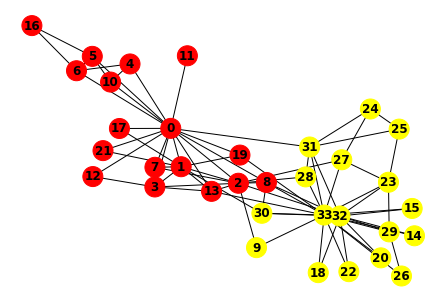

In [2]:
# Provided code
G = nx.karate_club_graph()
color_map_g = ['red'] * nx.number_of_nodes(G)
membership_g = [[], []]
dict_g = {}

print("==============================")
print("real partition")
for i in range(nx.number_of_nodes(G)) :
    if G.nodes[i]['club'] == 'Officer' :
        color_map_g[i] = 'yellow'
        membership_g[0].append(i)
        dict_g[i] = 0
    else :
        membership_g[1].append(i)
        dict_g[i] = 1
print("membership:", membership_g)
print(dict_g)
print("modularity:", community.modularity(dict_g, G))
print(color_map_g)
nx.draw_spring(G, node_size=400, node_color=color_map_g, with_labels=True, font_weight='bold')

partition based on modularity
membership: [[0, 1, 2, 3, 7, 11, 12, 13, 17, 19, 21], [4, 5, 6, 10, 16], [8, 9, 14, 15, 18, 20, 22, 26, 29, 30, 32, 33], [23, 24, 25, 27, 28, 31]]
{0: 0, 1: 0, 2: 0, 3: 0, 4: 1, 5: 1, 6: 1, 7: 0, 8: 2, 9: 2, 10: 1, 11: 0, 12: 0, 13: 0, 14: 2, 15: 2, 16: 1, 17: 0, 18: 2, 19: 0, 20: 2, 21: 0, 22: 2, 23: 3, 24: 3, 25: 3, 26: 2, 27: 3, 28: 3, 29: 2, 30: 2, 31: 3, 32: 2, 33: 2}
modularity: 0.41978961209730437
['red', 'red', 'red', 'red', 'blue', 'blue', 'blue', 'red', 'green', 'green', 'blue', 'red', 'red', 'red', 'green', 'green', 'blue', 'red', 'green', 'red', 'green', 'red', 'green', 'yellow', 'yellow', 'yellow', 'green', 'yellow', 'yellow', 'green', 'green', 'yellow', 'green', 'green']


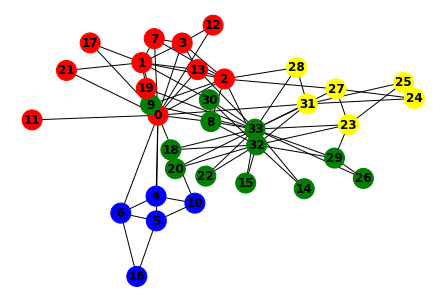

In [3]:
# Provided code
print("==============================")
print("partition based on modularity")
partition = community_louvain.best_partition(G)

#membership_b  = [[]] * (max(partition.values()) + 1) NG (all objects in the list will be the same)
m = max(partition.values()) + 1
membership_b  = [[] * m for i in range(m)]

for k, v in partition.items() :
    membership_b[v].append(k)
print("membership:", membership_b)
print(partition)
print("modularity:", community.modularity(partition, G))

color_map_b = ['red'] * nx.number_of_nodes(G)
for i in range(nx.number_of_nodes(G)) :
    color_map_b[i] = COLORS[partition[i]]
print(color_map_b)
nx.draw_spring(G, node_size=400, node_color=color_map_b, with_labels=True, font_weight='bold')

## Question 1 = Make a program of computing degree assortativity of Karate club network (use built-in function of network).

Nodes of High Degrees will tend to connect to Nodes of High Degrees, while Nodes of Low Degrees will tend to connect to Nodes of Low Degrees. 

This is a more specific metric than modularity (Q) in Questions 2-4, which looks at group membership. 

In this case, the below outcome of -0.47561 indicates that the structure of the network is more spread-out and star-like rather than having a dense core. 

In [4]:
r = nx.degree_assortativity_coefficient(G)
print("Degree Assortativity of Karate Club Network = %1.5f"%r)

Degree Assortativity of Karate Club Network = -0.47561


## Question 2 = What are the input(s) and output(s) of modularity Q? What does the output(s) mean?

Modularity is expressed by the equation Q $= \frac{1}{2m}\sum_{ij}(A_{ij}-\frac{k_{i}k_j}{2m}) \delta (c_i , c_j )$

### Input

The inputs are:

2m, which is the total number of ends (and m is the number of edges)

$A_{ij}$, which is the value corresponding to row i and column j in the Adjacency matrix of the network.


$k_ik_j$, which is the number of edges attached to vertex i multiplied by number of edges attached to vertex j, where i and j are enumerations of all vertices in the network. 

$\delta(c_i, c_j)$, which is the Kronecker Delta function fed with the groups of vertices i and j respectively, which generates 0 if i != j or 1 if i == j .   


### Output

The output is a coefficient that has a maximum value of 1.00. 

When positive, modularity Q indicates that the network is assortative, which is a tendency for similar vertices to share a common edge over what could be expected of random pairings in the network. An example would be social circles, where similar people attract.

When negative, it is indicates that the network is disassortative, which is the tendency for dissimilar vertices to share a common edge over what could be expected of random pairings in the network. An example would be dating networks, where opposite genders attract.


## Question 3 = Find the value of modularity when all vertices are classified in one group.

modularity when all members are in one group: 0.0


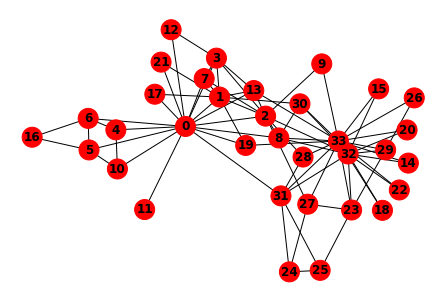

In [5]:
# Generate new Karate Club graph - H
H = nx.karate_club_graph()
color_map_h = ['red'] * nx.number_of_nodes(H)

# Generate corresponding dictionary with all vertices in group 0.
membership_h = [0] * nx.number_of_nodes(H)
dict_h = dict(zip(list(range(nx.number_of_nodes(H))), membership_h))

print("==============================")
print("modularity when all members are in one group:", community.modularity(dict_h, H))
nx.draw_spring(H, node_size=400, node_color=color_map_h, with_labels=True, font_weight='bold')

As expected, Q = 0.0 when $A_{ij}$−$\frac{k_{i}k_j}{2m}$ = 0, because the number of possible edges between same types and the expected number of edges in random are identical when there is only one group. 

## Question 4 = Make a program of showing an example of Karate club network when modularity value is negative.

It is obvious that we cannot create a negative modularity by assigning all members to different groups, since they would actually bring the value close to zero.

Instead, the strategy is to first initialise using the best partition (highest modularity), then modifying the graph by assigning each vertex to a group/colour that is least common among its neighbours, so as to create a situation where vertices are as disassortative as possible.

partition based on negative modularity


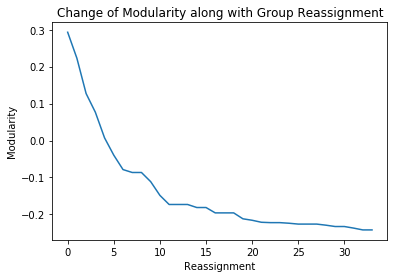

In [6]:
print("==============================")

# Generate new Karate Club graph - J
J = nx.karate_club_graph()
print("partition based on negative modularity")

# Constant: number of vertices in the graph
vertices_num = nx.number_of_nodes(J)

# Initialise by identifying current best partition (Highest Modularity)
partition_j = community_louvain.best_partition(J)
m_j = max(partition_j.values()) + 1
membership_j  = [[] * m_j for i in range(m_j)]
for k, v in partition_j.items() :
    membership_j[v].append(k)

color_map_jb = ['red'] * vertices_num
for i in range(vertices_num) :
    color_map_jb[i] = COLORS[partition_j[i]]

# Identify the priority of group reassignment (in descending degree centrality)
degree_order = nx.algorithms.coloring.strategy_largest_ﬁrst(J, "")
modularity_new = []

# Reassign groups in descending order of degree-centrality
for n in degree_order:
    tally = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0}
    for vertex in list(J[n]):
        tally[partition_j[vertex]] += 1
    partition_j[n] = (min(tally, key=tally.get))
    color_map_jb[n] = COLORS[partition_j[n]]
    modularity_new.append(community.modularity(partition_j, J))

# Plot graph of decrease of modularity
plt.title("Change of Modularity along with Group Reassignment")
plt.ylabel("Modularity")
plt.xlabel("Reassignment")
plt.plot(list(range(vertices_num)), modularity_new)

modularity: -0.24202827087442474


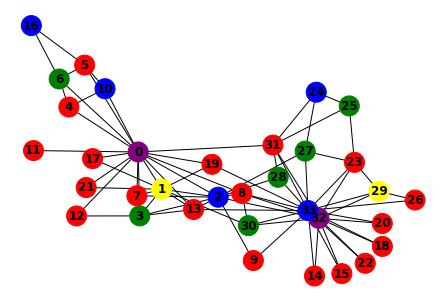

In [7]:
print("modularity:", community.modularity(partition_j, J))

nx.draw_spring(J, node_size=400, node_color=color_map_jb, with_labels=True, font_weight='bold')

The best grouping for a negative modularity would be to have fringe members be of one colour (red), while the more  central (degree) yet unconnected members be of either purple, blue, green or yellow.